#Statistic lab Ex2

*By:\
Ariel Ginensky: 312297559\
Ron Tzidon 315313577\
Shahar Zismanovich 205518905*

In [ ]:
import random
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('votes per ballot 2021.csv', encoding = "ISO-8859-8")

In [ ]:
df_miflagot = df.iloc[:,11:50].sum()
names = df.columns[11:50]
names = names.to_list()
voting_rate = df_miflagot/df["כשרים"].sum()

In [ ]:
df_miflagot
countim = np.random.choice(names, 2000,True, voting_rate)
omed = collections.Counter(countim)
omdim = pd.DataFrame.from_dict(omed,orient='index').reset_index().rename(columns={0:str(1)})
omdim = omdim.nlargest(13,str(1))

בחלק זה יצרנו טבלה שמספקת לנו אינפורמציה על שכיחויות הבחירה במפלגה על פי 2000 מדגמים על פי ההסתברויות של התוצאות הסופיות.
 השארנו במפלגה רק את 13 המפלגות הגדולות ביותר.
  בתא שמתחת, חזרנו על פעולה זו בלולאה 99 פעמים, ואיחדנו את העמודה שנוצרה לטבלה שכבר קיימת.\
   כתוספת לעמודה הראשונה שכבר יצרנו בתא שמעל. כל זאת כדי להגיע לטבלה של 13 על 100 שמאחדת בתוכה 100 מדגמים של 2000 מצביעים ל13 המפלגות הגדולות


In [ ]:
for i in range(2,101):
     countim = np.random.choice(names, 2000,True, voting_rate)
     omed1 = collections.Counter(countim)
     omdim1 = pd.DataFrame.from_dict(omed1,orient='index').reset_index().rename(columns={0:str(i)}).nlargest(13,str(i))
     omdim = pd.merge(omdim, omdim1, left_on="index", right_on="index")

1.A.b

כאן חישבנו על פי נוסחאות המוכרות לנו את ההטיה, השגיאה הריבועית הממוצעת והשונות.
 בחישוב ההטיה התייחסנו לתוצאות האמת כטטא ולאומד שלנו כאומד של טטא.
 את החישובים הצגנו בטבלה של 13 על 3 והוספנו לה את שמות המפלגות בעמודה נוספת לצורך הבהרה.

In [ ]:
party_mean = omdim.mean(axis=1)/2000
party_mean = party_mean.to_list()
real_rate = voting_rate.nlargest(13).to_list()
bias = (np.array(party_mean) - np.array(real_rate))
estimators = pd.DataFrame(bias, columns=["Bias"])
estimators["Var"] = omdim.var(1,ddof = 0)/2000
estimators['MSE'] = bias**2 + omdim.var(1,ddof = 0)/2000
estimators['Party'] = omdim.iloc[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


In [ ]:
estimators

,Bias,Var,MSE,Party
0,-0.000538,0.161289,0.161289,מחל
1,-0.000403,0.102285,0.102285,פה
2,0.000254,0.072494,0.072494,שס
3,-0.000666,0.052093,0.052093,כן
4,-0.001179,0.061271,0.061272,אמת
5,0.001816,0.052955,0.052958,ב
6,-0.001074,0.046515,0.046516,ג
7,-0.005414,0.047407,0.047436,ט
8,0.005725,0.058666,0.058699,ל
9,-0.000389,0.040077,0.040077,ת


1.A.c

הצגנו את האומד לשיעור התמיכה כהסתברות להצלחה לפי ההתפלגות הבינומית, וחישבנו את האומד לשונות הבינומית. הצגנו את את ההשוואה בגרף

In [ ]:
bin_var = np.array(party_mean)*(1-np.array(party_mean))

Text(0, 0.5, 'Binomial Variance')

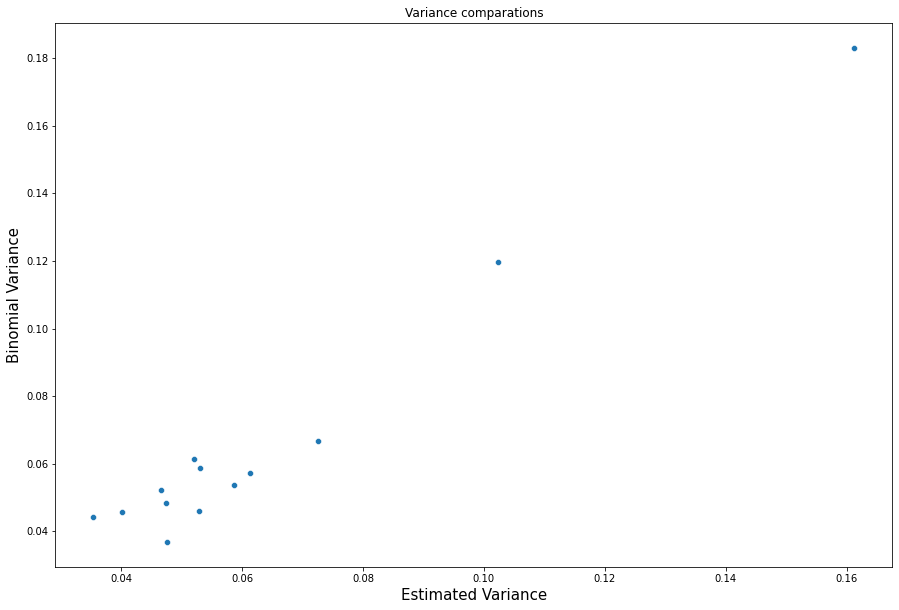

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=estimators.iloc[:,1], y=bin_var).set(title='Variance comparations')
plt.xlabel('Estimated Variance', fontsize=15)
plt.ylabel('Binomial Variance', fontsize=15)

**1**.B

In [ ]:
names_1b = omdim["index"].to_list()
names_1b.append("כשרים")

בסעיף זה חישבנו אומד על פי הגרלה  רנדומלית של 6 קלפיות 100 פעמים.
 חילקנו כל קלפי במספר הקולות הכשרים באותו קלפי לקבלת שיעור הצבעה.
 חזרנו בלולאה על אותה פעולה 99 פעמים נוספות והוספנו בכל פעם 6 שורות לטבלה.
זאת כמובן ל13 המפלגות הגדולות.

In [ ]:
kalpi_num = df.iloc[:,4]
kalpi_rand = df.sample(6)
kalpiz = kalpi_rand.loc[:,names_1b]
for i in range(6):
     kalpiz.iloc[i] = kalpiz.iloc[i]/kalpiz["כשרים"].iloc[i]
kalpiz = kalpiz.iloc[:,:13]
kalpiz

for i in range(99):
     kalpi_num = df.iloc[:,4]
     kalpi_rand = df.sample(6)
     kalpiz1 = kalpi_rand.loc[:,names_1b]
     for i in range(6):
          kalpiz1.iloc[i] = kalpiz1.iloc[i]/kalpiz1["כשרים"].iloc[i]
     kalpiz1 = kalpiz1.iloc[:,:13]
     kalpiz = kalpiz.append(kalpiz1)

,מחל,פה,שס,כן,אמת,ב,ג,ט,ל,ת,ודעם,מרצ,עם
9765,0.178404,0.267606,0.021127,0.143192,0.119718,0.025822,0.002347,0.021127,0.030516,0.058685,0.004695,0.107981,0.000000
8186,0.019417,0.063107,0.097087,0.160194,0.101942,0.300971,0.000000,0.000000,0.067961,0.033981,0.092233,0.053398,0.000000
9913,0.307054,0.045643,0.012448,0.024896,0.029046,0.041494,0.016598,0.012448,0.331950,0.041494,0.082988,0.012448,0.008299
2056,0.114754,0.043716,0.071038,0.038251,0.005464,0.016393,0.000000,0.000000,0.125683,0.032787,0.158470,0.043716,0.338798
7182,0.150215,0.298283,0.006438,0.145923,0.137339,0.038627,0.004292,0.006438,0.017167,0.051502,0.006438,0.120172,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,0.406375,0.127490,0.051793,0.051793,0.039841,0.027888,0.000000,0.019920,0.163347,0.059761,0.000000,0.019920,0.003984
9034,0.273764,0.212928,0.022814,0.125475,0.125475,0.098859,0.007605,0.019011,0.003802,0.053232,0.000000,0.045627,0.000000
10940,0.170843,0.325740,0.013667,0.125285,0.084282,0.100228,0.000000,0.013667,0.018223,0.054670,0.000000,0.088838,0.000000
1144,0.372222,0.100000,0.050000,0.038889,0.033333,0.086111,0.005556,0.038889,0.166667,0.061111,0.000000,0.019444,0.000000


**1** B.b
חישבנו לפי האומד שלנו גם כאן את ההטיה השונות והשגיאה הריבועית הממוצעת.

In [ ]:
E_teta = kalpiz.mean().to_list()
bias_b = np.array(E_teta) - np.array(real_rate)
var_b = kalpiz.var(0,ddof = 0)
estimators_b = pd.DataFrame(bias_b, columns=["Bias"])
estimators_b['Var'] = var_b.to_list()
estimators_b['MSE'] = (bias_b**2 + var_b).to_list()
estimators_b['Party'] = omdim.iloc[:,0]

In [ ]:
estimators_b

,Bias,Var,MSE,Party
0,-0.007445,0.023299,0.023355,מחל
1,-0.011659,0.010326,0.010462,פה
2,0.002545,0.010151,0.010158,שס
3,-0.006174,0.002722,0.002760,כן
4,-0.009350,0.003144,0.003232,אמת
5,-0.004074,0.003295,0.003312,ב
6,0.001266,0.027610,0.027611,ג
7,-0.001767,0.010118,0.010121,ט
8,0.010676,0.005906,0.006019,ל
9,-0.002410,0.001019,0.001025,ת


**1** B.c

בעזרת גרף בארים וקו טעות,
 ניתנת לנו הבנה של סטיית התקן לשיעורי ההצבעה של כל אחת מ13 המפלגות הגדולות לפי האומד.

Text(0, 0.5, 'Party')

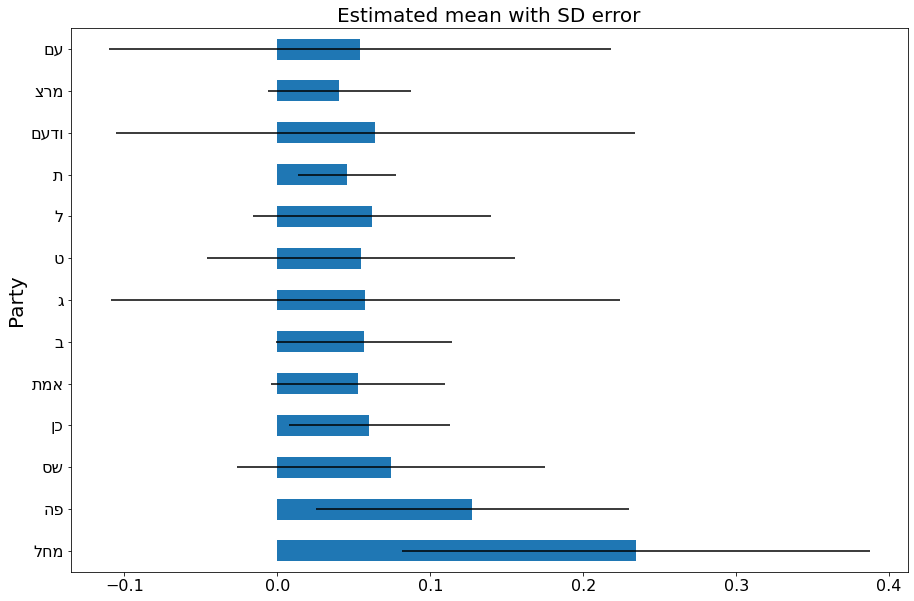

In [ ]:
plot_data = pd.DataFrame(E_teta, columns=["est_mean"])
plot_data['SD'] = np.sqrt((bias_b**2 + var_b).to_list())
names = omdim.iloc[:,0].values
reverse_names = [name[::-1] for name in names]
plot_data['Party'] = reverse_names
plot_data

mean_plot = plot_data.plot(kind = 'barh', y = "est_mean",fontsize = 16, legend = False, xerr = "SD",figsize = (15,10))
mean_plot.set_yticklabels(plot_data['Party'])
mean_plot.set_title("Estimated mean with SD error",fontsize = 20)
mean_plot.set_ylabel("Party", fontsize = 20)

**1** B.d
לאו דווקא. בגלל שמדובר בקלפיות ובחירת הקלפיות היא רנדומלית, לא ניתן לצפות בצורה חד משמעית לערכי שונות קרובים עבור מספר מנדטים דומה.
  אם במקרה ייבחרו 20 קלפיות שבהן התמיכה ביהודות התורה היא מואד גדולה לעומת קלפיות בודדות בהן התמיכה במפלגה זו היא קטנה,
   השונות תהיה משמעותית גדולה יותר לעומת בחירה רנדומלית של קלפיות בהן התמיכה במפלגה היא דומה

## Question 2
### a)

Downloading tabula-py in order to import pdfd data

In [ ]:
!pip install tabula-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabula import read_pdf
poll_21 = pd.DataFrame(read_pdf(
    "https://bechirot24.bechirot.gov.il/election/Decisions/Documents/%D7%9B%D7%A0%D7%A1%D7%AA%2024/%D7%A1%D7%A7%D7%A8%D7%99%D7%9D/seker_hadashot_19.3.21.pdf",
    pages="all")[1])

In order to compare between p and q, we need to rearange the indexes by parties.\
Also we wre adjusting the names so it would be more readable when we"ll use it later on.

In [ ]:
new_index = [0,1,5,9,2,8,7,6,11,4,3,10,12]
df2 = poll_21.iloc[:13,:].reindex(new_index)
new_names = df2.iloc[:,2].values
new_names[3] = 'כחול לבן'
new_names[0] = 'הליכוד'
new_names[7] = "ישראל ביתנו"

Now we will create two variables:\


1.  p is the frequencey vector we calculated in Qustion 1
2. q is the   
propablity vector we derive from the 21 polls data. 
In oder to use q in calculations, we will extract the precentage as string and transform it into float.
3. alpha range is an array of all the possible alpha values

Also we will set new axis for some of the data frames in order to use them all together.

In [ ]:
p = voting_rate.nlargest(13)
q = df2.iloc[:,0].str.rstrip("%").astype(float)/100
alpha_range = np.arange(0.01,1.01,0.01)
p.set_axis(new_names, inplace = True)
q.set_axis(new_names, inplace = True)
estimators_b["Party"] = new_names


Here we are cretaing an auxiliary function. \
The function recieves the original and the corresponding p and  q and returns bias for the weighted estimator.\
The function returns a numpy array with 100 items. 

In [ ]:
def alpha_squared_bias(bias,p,q):
  diff = q-p
  a = alpha_range*bias
  b = (1-alpha_range)*diff
  a_bias = np.add(a,b)
  return(np.square(a_bias))


Here we are creating another auxiliary function:\
The function recueves a party name and returns a numpy array contains 3 arrays:\
each array is a vectoe of an estimator (for variance, squared bias or MSE)\
for each of the alpha possible values. 
We can easily calculate these estimators due to the fact that $\hat p_{j}^{\alpha}$ is a linear transformation of $\hat p_{j}$.\
So we can use the estimators we found for $\hat p_{j}$ in Question 1 and the folloeing formulas:\
$var(\hat p_{j}^{\alpha}) = \alpha^{2}var(\hat p_{j})$\
$bias(\hat p_{j}^{\alpha}) = α*bias(\hat p_{j}) + (1-α)q$


In [ ]:
def get_estimators(party):
  estimators = estimators_b[estimators_b["Party"] == party].values[0]
  p_bias = estimators[0]
  p_var = estimators[1]
  p_mse = estimators[2]
  var = np.square(alpha_range)*p_var
  squared_bias = alpha_squared_bias(p_bias,p[party],q[party])
  mse=  np.add(var,squared_bias)
  return(np.array([var,squared_bias,mse]))



Now we will create plot for each of the parties with the new estimators as a function of $α$


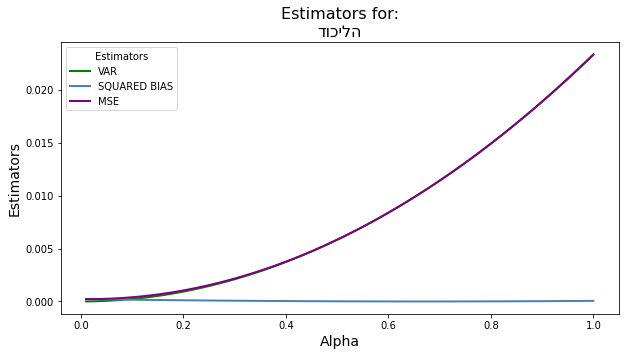

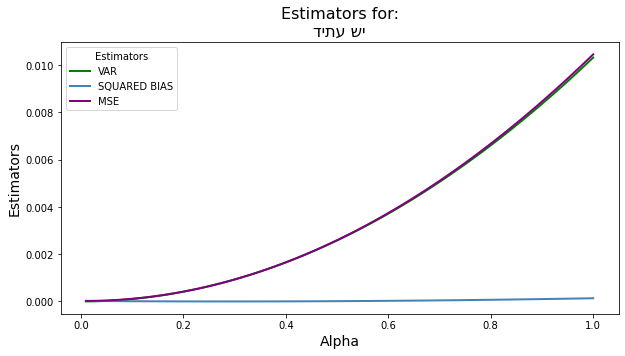

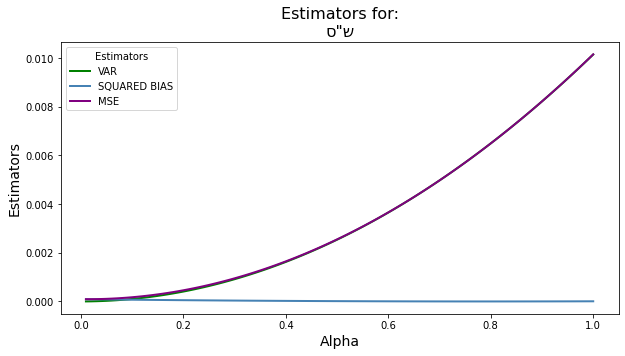

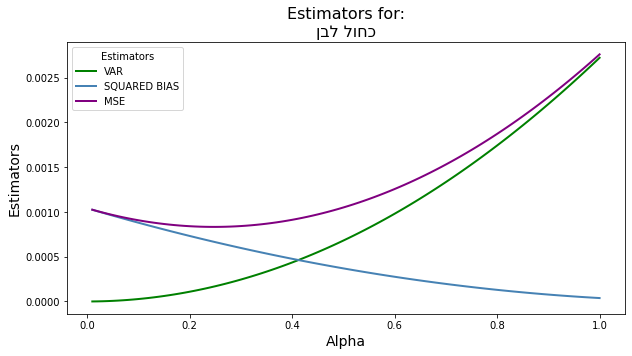

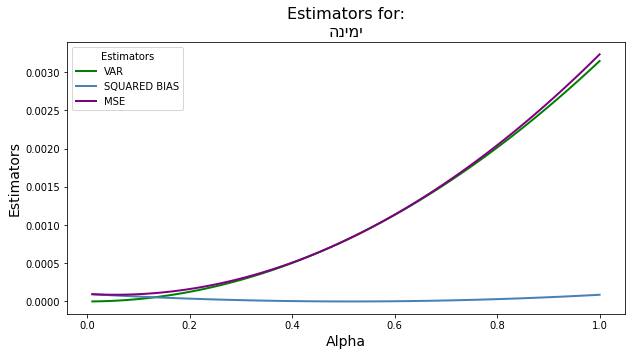

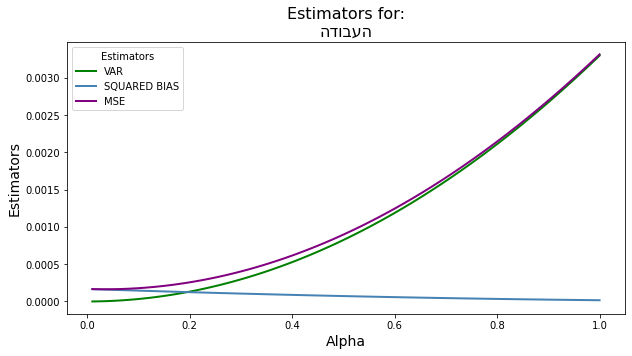

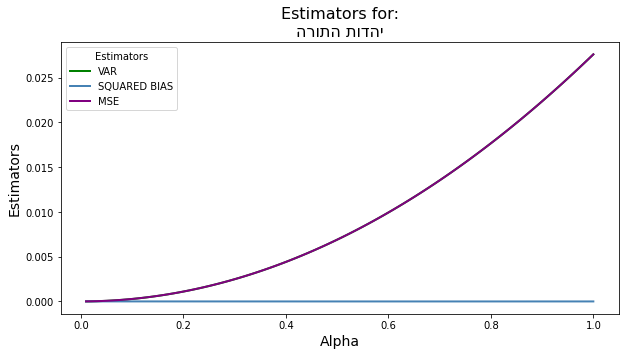

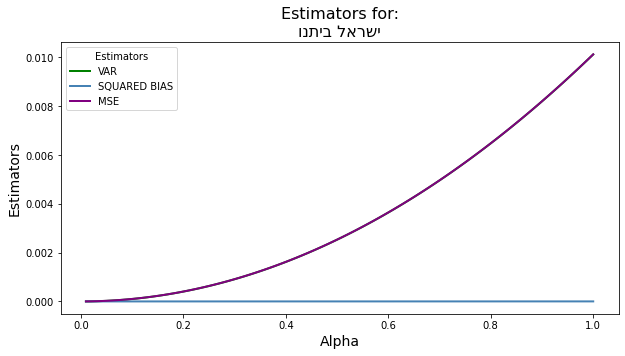

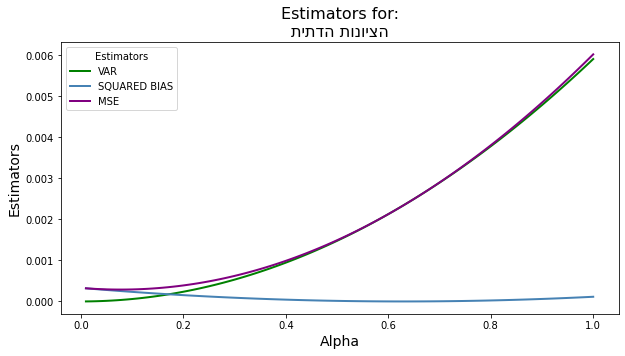

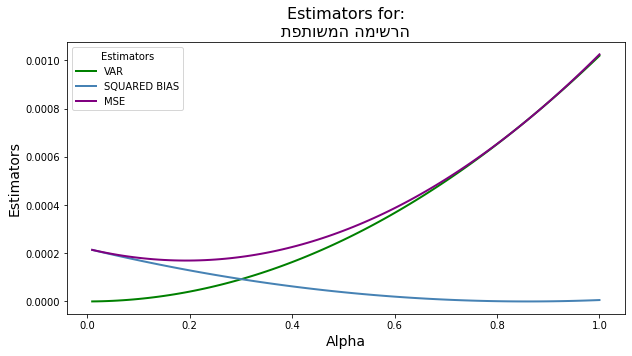

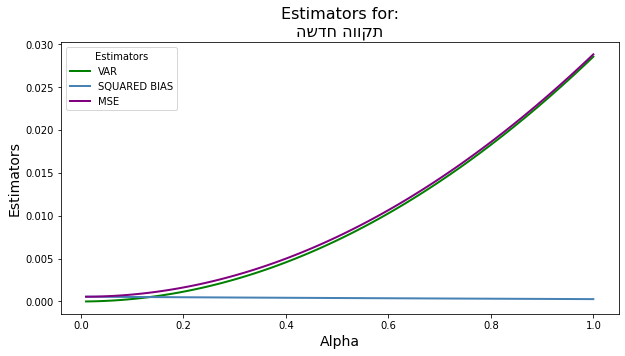

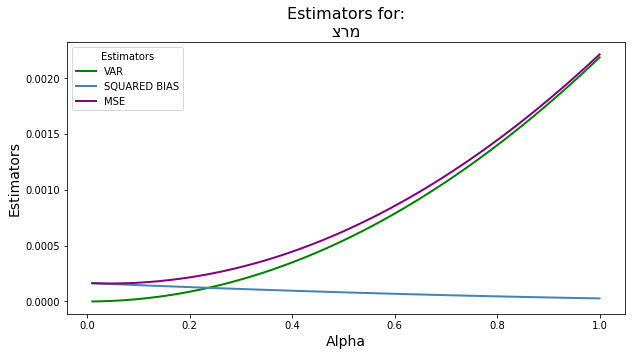

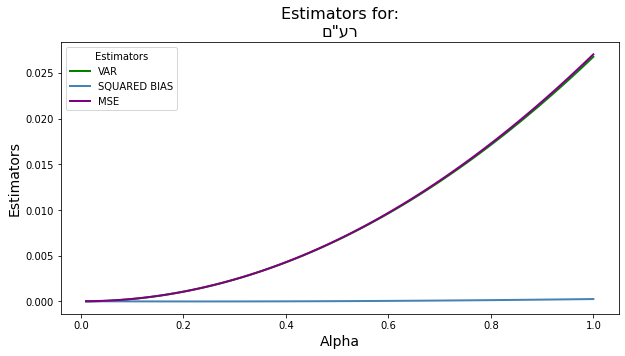

In [ ]:
for party in new_names:
  party_name = party[::-1]
  estimators = get_estimators(party)
  plt.figure(figsize=(10,5))
  plt.plot(alpha_range,estimators[0], label='VAR', color='green',linewidth=2)
  plt.plot(alpha_range,estimators[1], label="SQUARED BIAS", color='steelblue',linewidth=2)
  plt.plot(alpha_range,estimators[2], label='MSE', color='purple',linewidth=2)
  plt.legend(title='Estimators')
  plt.ylabel('Estimators', fontsize=14)
  plt.xlabel('Alpha', fontsize=14)
  plt.title('Estimators for:' +"\n" +  party_name, fontsize=16)

  plt.show()

## b)

In order to calculate the minimizes $\alpha$ for the MSE estimator, when we know that $\hat p_{j}$ is unbiased, we computed the followig foemula:\
$\alpha = \frac{(p-q)^{2}}{var(\hat p_{j})+(p-q)^{2}}$\
First we"ll set some variables, then we"ll compute the value as a new data frame calles alpha_df.

In [ ]:
var_p_hat = estimators_b['Var'].to_numpy()
q_vals = q.to_numpy()
p_vals = p.to_numpy()
diff = np.subtract(q_vals,p_vals)
var_p_hat = estimators_b['Var'].to_numpy()
diff_square = np.square(diff)
alpha = np.divide(diff_square,np.add(diff_square,var_p_hat))
alpha_df = pd.DataFrame(alpha, new_names).T

In order to find the coordinates for the value we found, we"ll compute the corresponding MSE value:

In [ ]:
bias_p_hat = estimators_b["Bias"].to_numpy()
a = np.multiply(alpha,bias_p_hat)
b = np.multiply(1-alpha,diff)
c = np.multiply(np.square(alpha),var_p_hat)
d = np.add(a,b)
mse_alpha = np.add(c,np.square(d))
alpha_y_df = pd.DataFrame(mse_alpha,new_names).T


Now we will iterare over each party' create the plots as we did before and add the new coordinate we got.

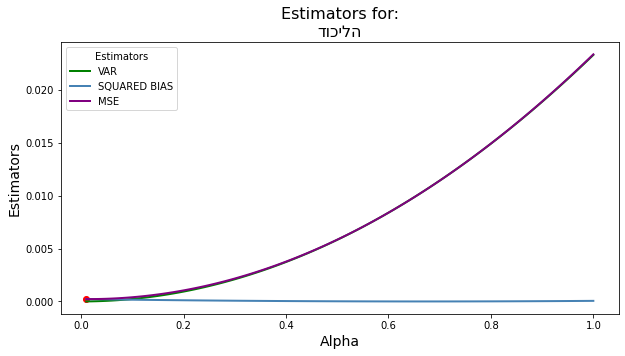

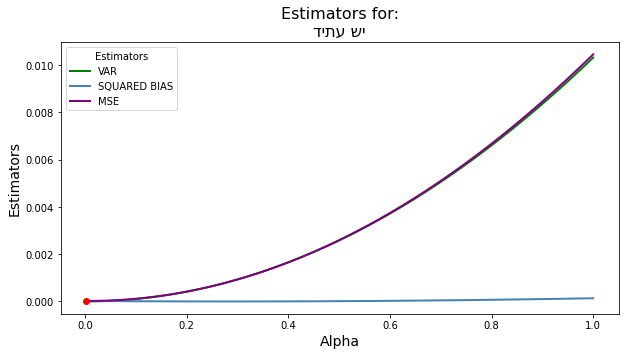

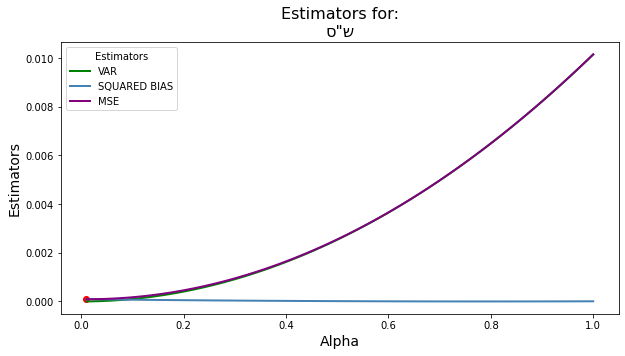

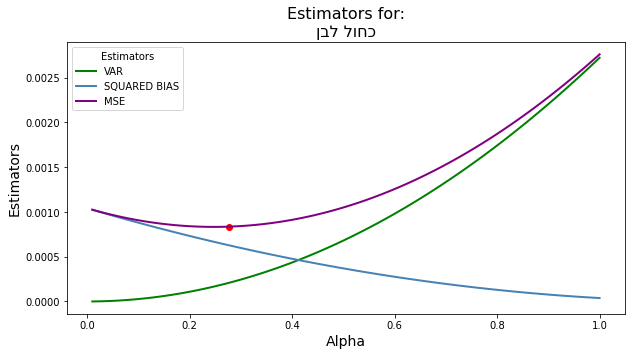

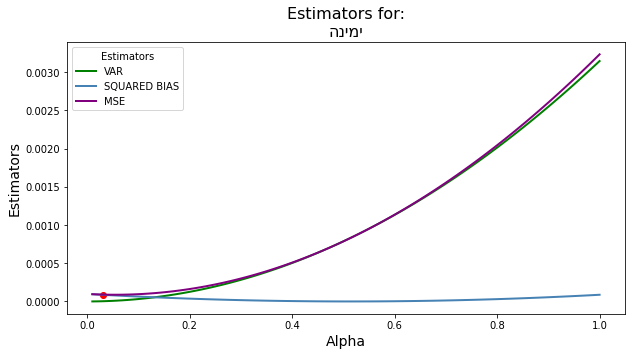

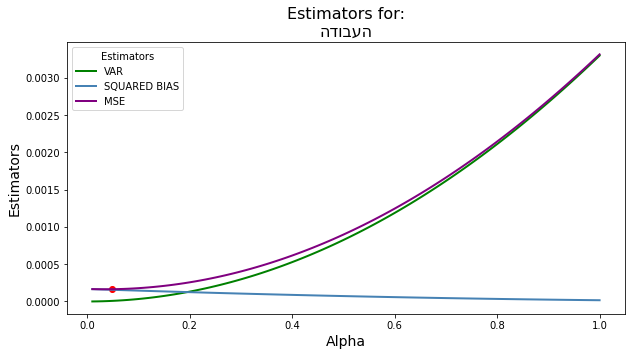

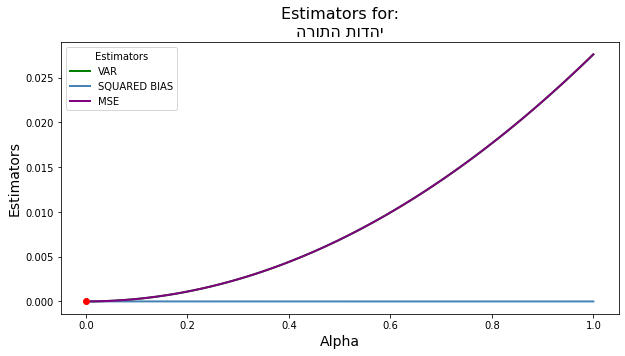

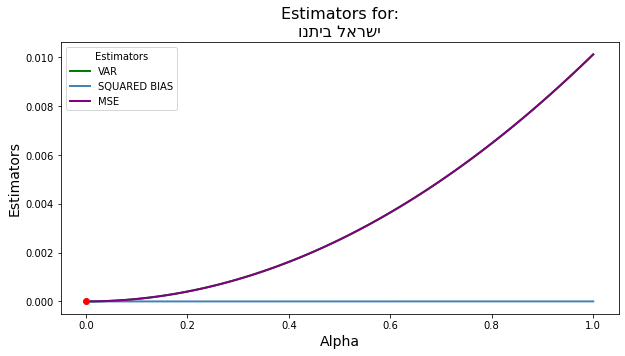

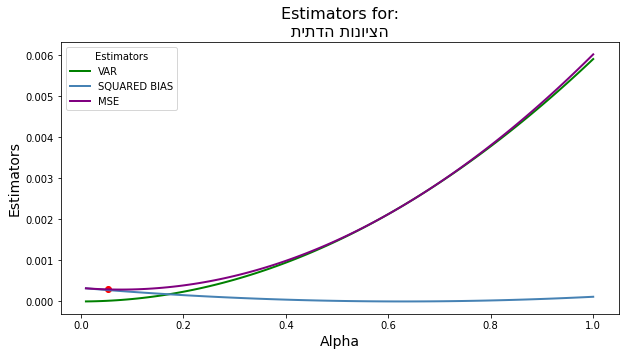

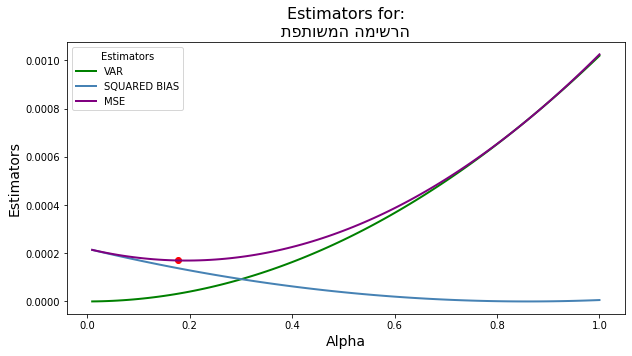

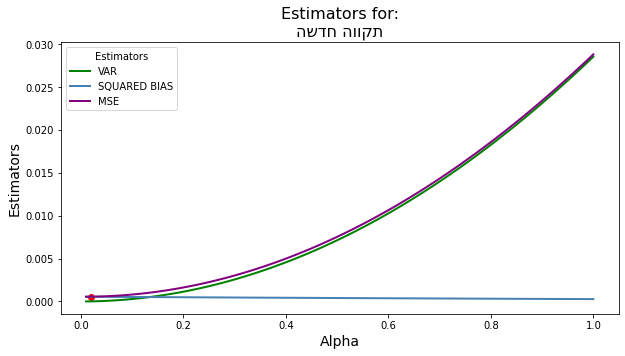

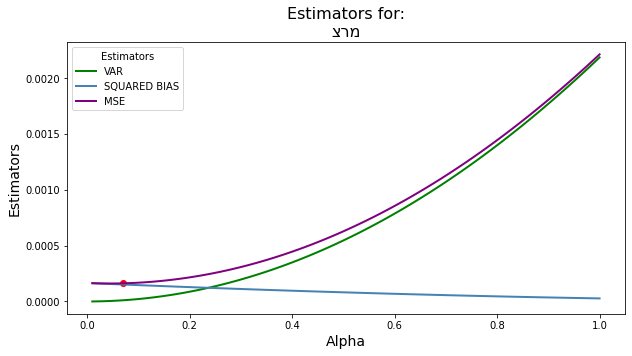

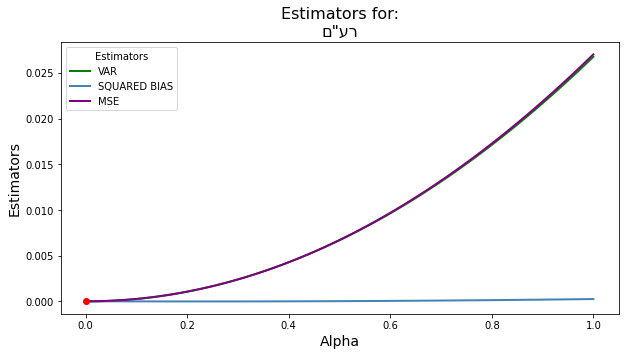

In [ ]:
for party in new_names:
  party_name = party[::-1]
  estimators = get_estimators(party)
  alpha_x = alpha_df[party].values[0]
  alpha_y = alpha_y_df[party].values[0]
  plt.figure(figsize=(10,5))
  plt.scatter(x = alpha_x, y = alpha_y,color ='red')
  plt.plot(alpha_range,estimators[0], label='VAR', color='green',linewidth=2)
  plt.plot(alpha_range,estimators[1], label="SQUARED BIAS", color='steelblue',linewidth=2)
  plt.plot(alpha_range,estimators[2], label='MSE', color='purple',linewidth=2)
  plt.legend(title='Estimators')
  plt.ylabel('Estimators', fontsize=14)
  plt.xlabel('Alpha', fontsize=14)
  plt.title('Estimators for:' +"\n" +  party_name, fontsize=16)

  plt.show()

As we can see from the graph above the value we found is the minimum value of the MSE graph.

## C) 
For most parties the MSE function rises monotomsly, and for all it grows monotomisly for alpha>o.2.We can see that for all thirteen paties the MSE is smaller for alpha=0.5 in comparison to alpha=1.\
We would recommend alpha=0.2 for all parties since it is the largest minimizing alpha across all thirteen parties.